In [225]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import DFGLS

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [234]:
url = "https://www.fbc.keio.ac.jp/~tyabu/keiryo/spread_data.csv"
df = pd.read_csv(url)

# Create a time series
df['time'] = pd.date_range(start='1980-01-01', periods=len(df), freq='Q')
df['spread'] = df['r_long'] - df['r_short']
df['l.spread'] = df['spread'].shift(1)
df['dspread'] = df['spread'] - df['l.spread']

df = df.dropna()
df = df.reset_index(drop=True)

df.head()

,r_short,r_long,time,spread,l.spread,dspread
0,12.590667,8.916000,1980-06-30,-3.674667,-1.184000,-2.490667
1,11.202667,8.435000,1980-09-30,-2.767667,-3.674667,0.907000
2,9.999667,8.642333,1980-12-31,-1.357333,-2.767667,1.410333
3,8.383667,8.300333,1981-03-31,-0.083333,-1.357333,1.274000
4,7.318333,8.073333,1981-06-30,0.755000,-0.083333,0.838333


## 15.2.2節の推定

### 図15.3(a)

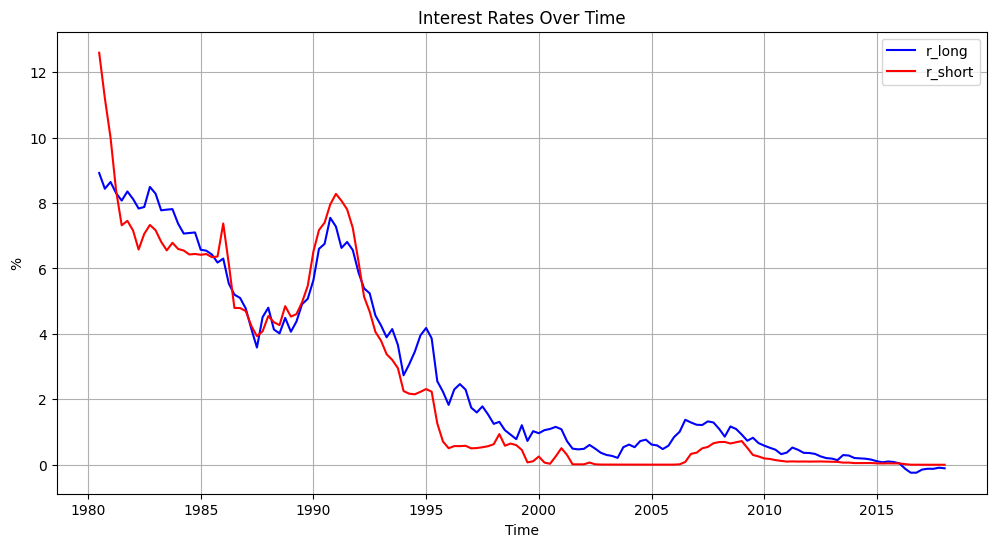

In [4]:
# Plotting the interest rates
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['r_long'], color='blue', label='r_long')
plt.plot(df['time'], df['r_short'], color='red', label='r_short')
plt.xlabel('Time')
plt.ylabel('%')
plt.legend()
plt.title('Interest Rates Over Time')
plt.grid()
plt.show()

### 図15.3(b)

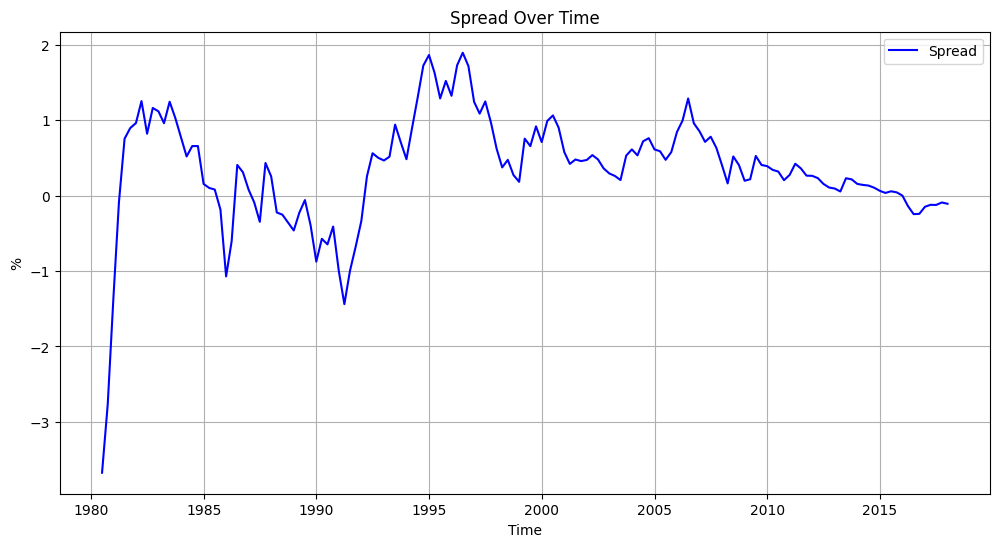

In [22]:
# Plotting the spread
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['spread'], color='blue', label='Spread')
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Spread Over Time')
plt.legend()
plt.grid()
plt.show()

In [5]:
# Linear model for spread
endog = df['spread']
exog = sm.add_constant(df['l.spread'])

model = sm.OLS(endog, exog).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 spread   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     473.8
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           3.95e-48
Time:                        19:22:52   Log-Likelihood:                -59.898
No. Observations:                 151   AIC:                             123.8
Df Residuals:                     149   BIC:                             129.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0546      0.032      1.683      0.0

## 16.2.4節

In [6]:
# Linear model for dspread
model = sm.OLS(df['dspread'], sm.add_constant(df['l.spread'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                dspread   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     12.34
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           0.000588
Time:                        19:22:53   Log-Likelihood:                -59.898
No. Observations:                 151   AIC:                             123.8
Df Residuals:                     149   BIC:                             129.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0546      0.032      1.683      0.0

### ADF検定

In [134]:
def adfuller_test(series, regression='n', maxlag=None, autolag='AIC'):
    result = adfuller(series, regression=regression, maxlag=maxlag, autolag=autolag)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'{autolag} lags: {result[2]}')
    print(f'Number of observations: {result[3]}')
    print(f'Critical Values: {result[4]}')
    print(f'maximized information criterion: {result[5]}')

#### 定数項・トレンド項なし

In [135]:
adfuller_test(df['spread'], regression='n')

ADF Statistic: -3.188505857277493
p-value: 0.0014320484681051968
AIC lags: 2
Number of observations: 148
Critical Values: {'1%': np.float64(-2.581012342951059), '5%': np.float64(-1.9429588583721598), '10%': np.float64(-1.6151414856474442)}
maximized information criterion: 10.035075855018675


p値が0.01より小さいので，帰無仮説(単位根が存在する)を1%の有意水準で棄却出来る．

よって定常である．

#### 定数項あり・トレンド項なし

In [136]:
adfuller_test(df['spread'], regression='c')

ADF Statistic: -4.01306835016134
p-value: 0.0013436064159942295
AIC lags: 2
Number of observations: 148
Critical Values: {'1%': np.float64(-3.4753253063120644), '5%': np.float64(-2.881274703275226), '10%': np.float64(-2.5772928360116873)}
maximized information criterion: 11.085456012642993


p値が0.01より小さいので，帰無仮説(単位根が存在する)を1%の有意水準で棄却出来る．

よって定常である．

#### 定数項・トレンド項あり

In [137]:
adfuller_test(df['spread'], regression='ct')

ADF Statistic: -4.019209643358431
p-value: 0.008256419762408925
AIC lags: 2
Number of observations: 148
Critical Values: {'1%': np.float64(-4.02127882271287), '5%': np.float64(-3.440581388836791), '10%': np.float64(-3.144706364874736)}
maximized information criterion: 13.077655218981619


p値が0.01より小さいので，帰無仮説(単位根が存在する)を1%の有意水準で棄却出来る．

よって定常である．

### GLS-DF検定

ラグ次数の最大は10までとした．

#### トレンドなし

In [266]:
dfgls_test = DFGLS(df['spread'], max_lags=10, trend='c', method='t-stat')
print(dfgls_test.summary())

      Dickey-Fuller GLS Results      
Test Statistic                 -0.545
P-value                         0.501
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -2.70 (1%), -2.08 (5%), -1.76 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


テスト統計量は $-0.545$.

10%有意水準の臨界値 $-1.76$ より大きいので，帰無仮説(単位根が存在する)を棄却出来ない．

#### トレンドあり

In [262]:
dfgls_test = DFGLS(df['spread'], max_lags=10, trend='ct', method='t-stat')
print(dfgls_test.summary())

      Dickey-Fuller GLS Results      
Test Statistic                 -1.261
P-value                         0.716
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.55 (1%), -2.98 (5%), -2.69 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


テスト統計量は $-1.261$.

10%有意水準の臨界値 $-2.69$ より大きいので，帰無仮説(単位根が存在する)を棄却出来ない．

## 練習問題

短期金利と長期金利にはトレンドがあるので，ケース3を考える．

DF-GLS検定は以下となる．

### 長期金利

In [263]:
dfgls_test = DFGLS(df['r_long'], max_lags=10, trend='ct', method='t-stat')
print(dfgls_test.summary())

      Dickey-Fuller GLS Results      
Test Statistic                 -1.786
P-value                         0.415
Lags                                6
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.56 (1%), -2.98 (5%), -2.69 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


テスト統計量は $-1.786$.

10%有意水準の臨界値 $-2.69$ より大きいので，帰無仮説(単位根が存在する)を棄却出来ない．

### 短期金利

In [264]:
dfgls_test = DFGLS(df['r_short'], max_lags=10, trend='ct', method='t-stat')
print(dfgls_test.summary())

      Dickey-Fuller GLS Results      
Test Statistic                 -1.592
P-value                         0.528
Lags                                3
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.55 (1%), -2.98 (5%), -2.69 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


テスト統計量は $-1.592$.

10%有意水準の臨界値 $-2.69$ より大きいので，帰無仮説(単位根が存在する)を棄却出来ない．